In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as ticker

food_df = pd.read_excel('dataset_1/dairy_nutrition_1.xlsx')

<font size = 6>

**a)Present your PCA analysis with all the necessary outputs and graphs. Explain all decisions made in the analysis.**


## Checking the dataset
Firstly, to find out what I'm working with such as the types of columns in the dataset and other details about the dataset, I used head and info. <br>
As we can see from the next results, we have a total of 10 columns, 2 descriptive columns, `Type` and `Description`, and 8 float/int columns which are all the nutritional info of the type of food.

In [114]:
food_df.head()

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,"Cheese food, cold pack, American",19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,"Cream, whipped, cream topping, pressurized",3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,"Fat free ice cream, no sugar added, flavors ot...",4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,"Milk, whole, 3.25% milkfat, with added vitamin D",3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,"Milk, whole, 3.25% milkfat, without added vita...",3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [115]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         167 non-null    object 
 1   Description  167 non-null    object 
 2   Protein_g    167 non-null    float64
 3   Fat_g        167 non-null    float64
 4   Carb_g       167 non-null    float64
 5   Sugar_g      167 non-null    float64
 6   VitA_mcg     167 non-null    int64  
 7   VitB6_mg     167 non-null    float64
 8   VitB12_mcg   167 non-null    float64
 9   Calcium_mg   167 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 13.2+ KB


## Cleaning the Data

- Dropping descriptive columns, noting units used in different columns
- Scaling the data appropriately, depending if the range of the data is too huge
- Visualise the data if needed
- Checking the details of different features using `describe()` as we may need the values later on

In [116]:
#Dropping Type and Description
cleaned_food = food_df.drop(['Type', 'Description'], axis=1)

cleaned_food.describe()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,12.858862,13.423713,11.591078,7.901557,125.508982,0.075443,0.861557,379.808383
std,10.343437,12.207545,13.944322,12.272961,128.388335,0.084590,0.848805,342.706238
min,0.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,3.565000,1.325000,3.390000,0.505000,14.000000,0.038000,0.345000,115.000000
50%,8.120000,9.970000,5.480000,3.240000,73.000000,0.050000,0.520000,171.000000
75%,22.385000,25.630000,12.565000,9.545000,225.000000,0.076000,1.245000,673.500000
max,37.860000,37.000000,75.420000,58.010000,709.000000,0.567000,4.030000,1257.000000


To properly display the range of values in the features, I will use a boxplot.

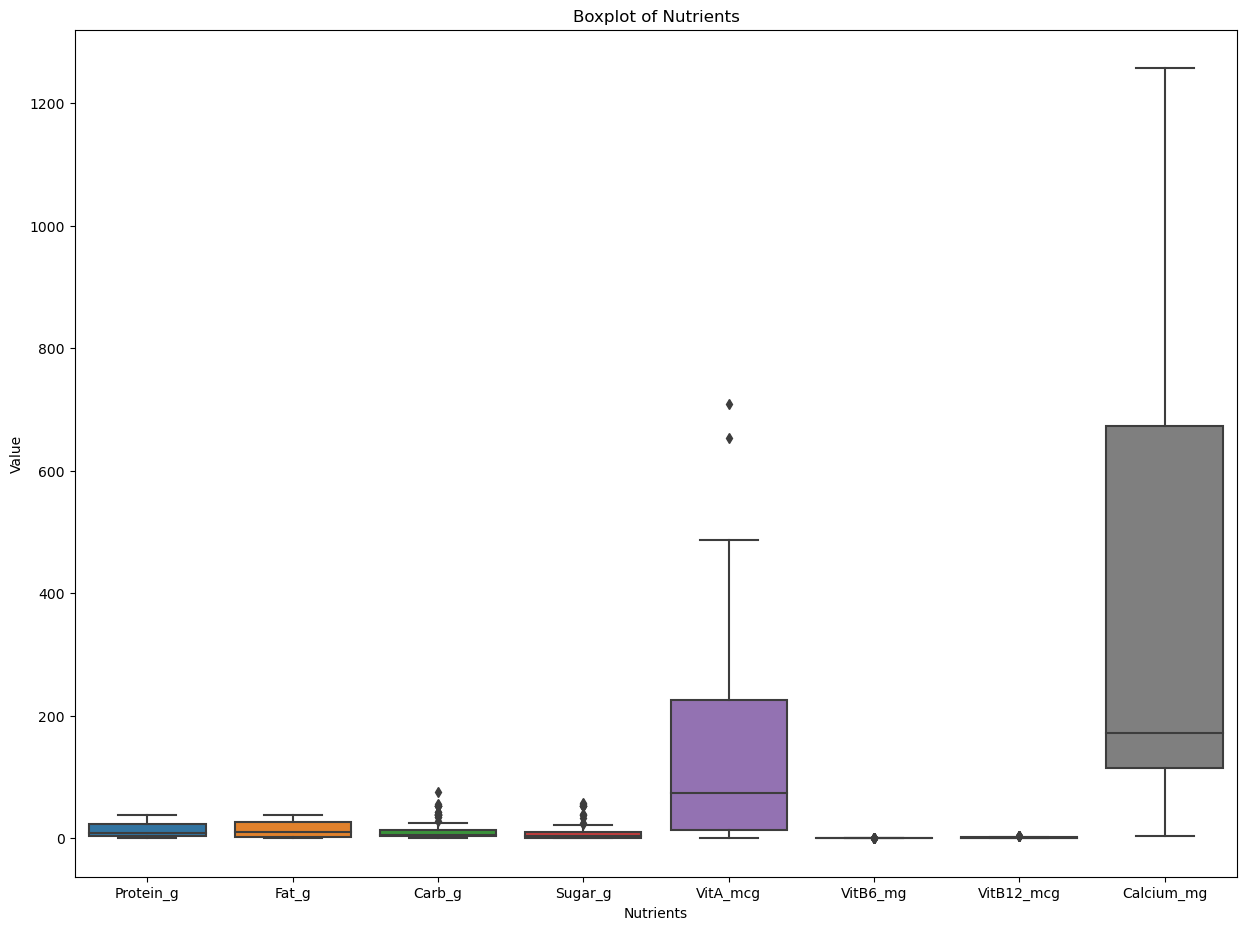

In [117]:
subset_df = cleaned_food[['Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g','VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'Calcium_mg']]

plt.figure(figsize=(15, 11))
sns.boxplot(data=subset_df)
plt.xlabel('Nutrients')
plt.ylabel('Value')
plt.title('Boxplot of Nutrients')
plt.show()

As we can see from the boxplot, Vitamin A and Calcium have a range much higher than the other nutrients. Therefore, we will need to scale the data accordingly before we can perform PCA on the data. However, first, we will plot a countplot to see if there is enough data in order to classify the different types of food by clustering.

Next, we will use standard scaler, a scaler by scikitlearn, to scale our data such that the features with larger values do not sway the evaluation too much.

In [118]:
scaler = StandardScaler() # StandardScaler object
scaler.fit(cleaned_food) # fit scaler on original data

scaled_data = pd.DataFrame(scaler.transform(cleaned_food), columns = cleaned_food.columns) # standardize data
scaled_data.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.659509,0.906774,-0.235287,-0.645755,-0.980513,0.777323,0.494462,0.342988
1,-0.936624,0.722729,0.064659,0.008045,0.488198,-0.408400,-0.675392,-0.815996
2,-0.819290,-1.102931,1.175969,0.075060,0.058522,-0.550687,-0.403608,-0.681367
3,-0.941473,-0.835902,-0.488479,-0.233043,-0.621148,-0.467686,-0.486325,-0.780875
4,-0.941473,-0.834259,-0.489917,-0.233043,-0.621148,-0.467686,-0.486325,-0.780875


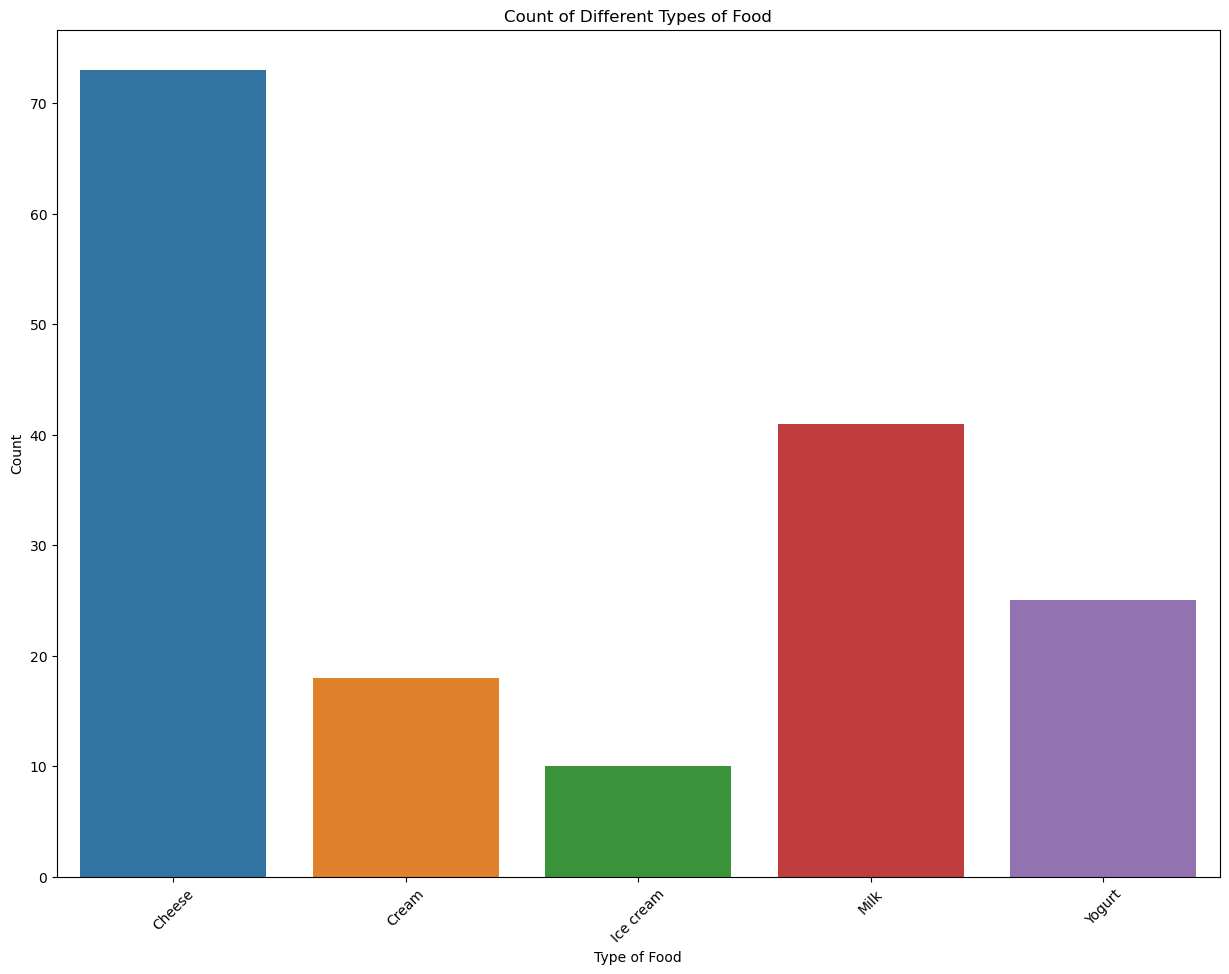

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 11))
sns.countplot(data = food_df, x='Type')
plt.xlabel('Type of Food')
plt.ylabel('Count')
plt.title('Count of Different Types of Food')
plt.xticks(rotation=45)
plt.show()

## Performing PCA
- use sklearn's PCA, apply PCA on all 8 of our variables
- display values of PCA
- using kaiser's rule, the scree plot or cumulative explained variance, decide which PCs to use

In [120]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components = 8).fit(scaled_data)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(scaled_data)

In [121]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

<Figure size 640x480 with 0 Axes>

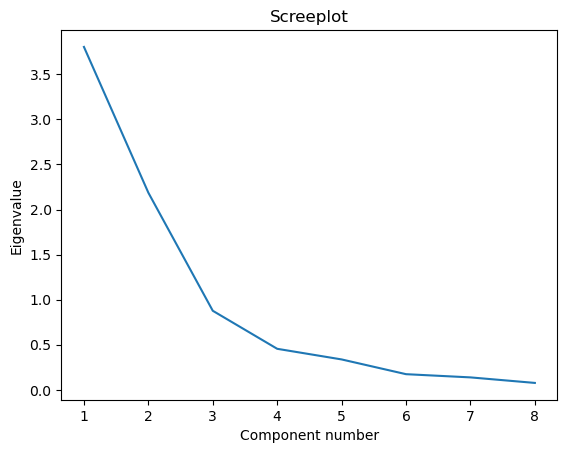

,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.8033,0.4726,0.4672,0.2910,0.0722,0.0973,0.3685,0.3653,0.4428,0.4658
PC 2,2.1864,0.2717,-0.1304,-0.3270,0.6181,0.6013,-0.1793,0.2452,0.1731,-0.1013
PC 3,0.8770,0.1090,0.1499,-0.5816,-0.2952,-0.3342,-0.4485,0.3675,0.3054,0.1048
PC 4,0.4553,0.0566,-0.3557,-0.0411,-0.0879,-0.1750,0.5117,0.6183,-0.0237,-0.4345
PC 5,0.3374,0.0419,0.0185,-0.6631,-0.0425,0.0488,0.6043,-0.3922,0.0352,0.1882
PC 6,0.1738,0.0216,-0.1596,0.1216,0.2826,-0.3722,0.0149,-0.3497,0.7240,-0.3077
PC 7,0.1382,0.0172,0.4297,-0.1099,0.6124,-0.5143,0.0459,0.0749,-0.3875,-0.0765
PC 8,0.0769,0.0095,-0.6365,0.0427,0.2474,-0.2851,-0.0395,0.0857,-0.0674,0.6611


In [122]:
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

pca_results = pca_results(scaled_data, pca) # use function created to show table
pca_results

In [123]:
pca2 = PCA(n_components = 2).fit(scaled_data) # fit a PCA object to extract first 2 PCs
pca2_results = pca2.transform(scaled_data)
pca_components_df = pd.DataFrame(pca2.components_, columns = scaled_data.columns) # Linear system for PC1 and PC2
pca_components_df = pca_components_df.rename(index = {0:'PC1', 1:'PC2'})
pca_components_df

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC1,0.467243,0.290999,0.07220,0.097287,0.368496,0.365326,0.442831,0.465805
PC2,-0.130419,-0.327025,0.61808,0.601273,-0.179329,0.245191,0.173100,-0.101260


In [124]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax


<font size = 5>

**(b) Which type(s) of dairy product has/have the following attributes?** <br>
- (i) Low carbohydrates and sugar but high in other nutrients.<br>
- (ii) High carbohydrates and sugar but low in other nutrients.<br>



In [125]:
type_data = pd.concat([food_df['Type'], scaled_data], axis = 1) # combine original data with standardized data

def calc_line(protein, fat, carb, sugar, vitA, vitB6, vitB12, calcium): # calculate direction on biplot using nutrient values
    variables = pd.DataFrame([[protein, fat, carb, sugar, vitA, vitB6, vitB12, calcium]], columns=cleaned_food.columns) 
    variables_scaled = scaler.transform(variables)[0] # standardize the values (using fit from original data) and make into 1d array
    calc_pc1 = np.dot(np.array(pca2.components_)[0], variables_scaled)
    calc_pc2 = np.dot(np.array(pca2.components_)[1], variables_scaled) 

    return calc_pc1, calc_pc2

fig = px.scatter(pca2_results, x = 0, y = 1, color = type_data['Type']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Biplot: Low in carbohydrates and sugar, high in other nutrients',
    xaxis_title = "PC1",
    yaxis_title = "PC2",
    legend_title = "Type",
    width = 1200, 
    height = 900
)

loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_) # calculate loadings for the PCA

# add loadings to the plot
features = list(scaled_data.columns) 
for i, feature in enumerate(features):
    fig.add_shape(
        type = 'line',
        x0 = 0, y0 = 0,
        x1 = loadings[i, 0],
        y1 = loadings[i, 1]
    )
    fig.add_annotation(
        x = loadings[i, 0],
        y = loadings[i, 1],
        ax = 0, ay = 0,
        xanchor = "center",
        yanchor = "bottom",
        text = feature,
    )

fig.show()

In [129]:
values = np.array([[22.17, 22.35, 2.22, 1.01, 181, 0.034, 2.28, 505]]) # put values in numpy array
scaled_values = scaler.transform(pd.DataFrame(values, columns = scaled_data.columns)) # standardize values
pc_equations = np.array(pca2.components_).T # transpose linear equations for PC1 and PC2

score = np.dot(scaled_values, pc_equations) # matrix multiplication to get vector from nutrient values given
score

array([[ 1.42497828, -1.05805442]])

In [130]:
fig = px.scatter(pca2_results, x = 0, y = 1, color = type_data['Type']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title = 'Score Plot with Point Calculated',
    xaxis_title = "PC1",
    yaxis_title = "PC2",
    legend_title = "Type"
)

fig.add_trace( # plot the calculated score on the score plot
    go.Scatter(
        mode = 'markers',
        x = [score[0, 0]],
        y = [score[0, 1]],
        marker = dict(
            color = 'darkslateblue',
            size = 14,
        ),
        showlegend = True,
        name = 'Point Calculated'
    )
)

fig.show()

In [131]:
values = np.array([[4.32, 1.42, 23.0, 14.58, 13, 0.047, 0.53, 114]]) # put values in numpy array
scaled_values = scaler.transform(pd.DataFrame(values, columns = scaled_data.columns)) # standardize values
pc_equations = np.array(pca2.components_).T # transpose linear equations for PC1 and PC2

score = np.dot(scaled_values, pc_equations) # matrix multiplication to get vector from nutrient values given
score

array([[-1.54450575,  1.35179668]])

In [127]:
fig = px.scatter(pca2_results, x = 0, y = 1, color = type_data['Type']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title = 'Score Plot with Point Calculated',
    xaxis_title = "PC1",
    yaxis_title = "PC2",
    legend_title = "Type"
)

fig.add_trace( # plot the calculated score on the score plot
    go.Scatter(
        mode = 'markers',
        x = [score[0, 0]],
        y = [score[0, 1]],
        marker = dict(
            color = 'darkslateblue',
            size = 14,
        ),
        showlegend = True,
        name = 'Point Calculated'
    )
)

fig.show()